# Simple Individual Data Generation Example
For the individual data generation, the probability to have a true positive label is dependant on the previous predictions for the individual. In the simple generator, points can either be sampled from the positive or negative cluster and the number of previous positive predictions defines the probability for a point to be sampled from one of the two clusters. 

In [1]:
import sys
import numpy as np
sys.path.append("../")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from aif360.algorithms.inprocessing import PrejudiceRemover

from long_term_fairness.ltf_plot import LongTermFairnessPlot
from long_term_fairness.ltf_data.individual_data_generator_simple import DataGenerator as IndDataGenSim
from long_term_fairness.ltf_aif.longterm_aif import AifLongTermMetric, AifLongTermPrediction

Import error: No module named 'tensorflow'


In [2]:
class CLF:
    def __init__(self, clf=LogisticRegression()):
        self.c = clf
    def predict(self, X, X_s):
        return self.c.predict(X)
    def fit(self, X, X_s, y):
        self.c.fit(X, y)   

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
generator = IndDataGenSim(mean_pos=[0, 1],
                          mean_neg=[15, 16],
                          num_positive_label=100,
                          num_negative_label=100,
                          discrimination_factor=.9)

In [5]:
metric = AifLongTermMetric()

In [6]:
#clf = AifLongTermPrediction(PrejudiceRemover())
clf = CLF(LinearSVC())

In [7]:
l = LongTermFairnessPlot(generator, clf, metric.metric, x_lim=[-3, 20], y_lim=[-1, 20])

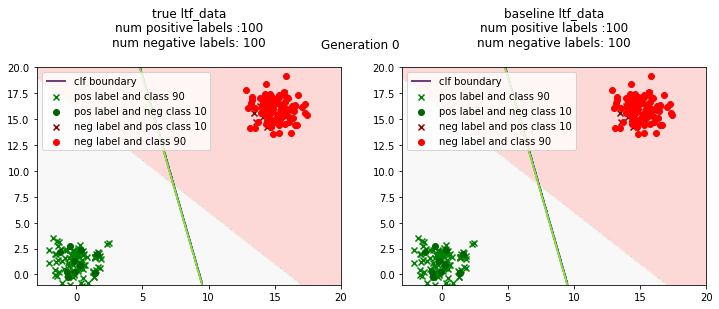

In [8]:
l.init_data()
l.plot_generation()

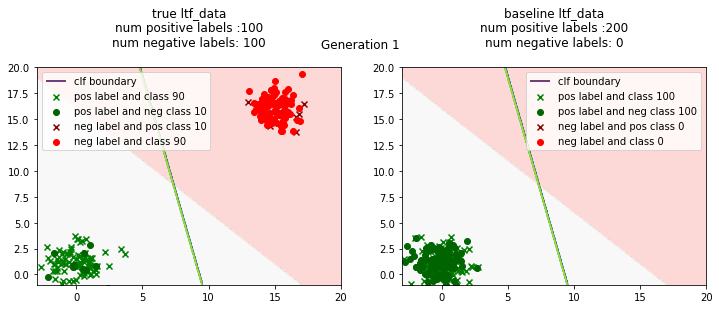

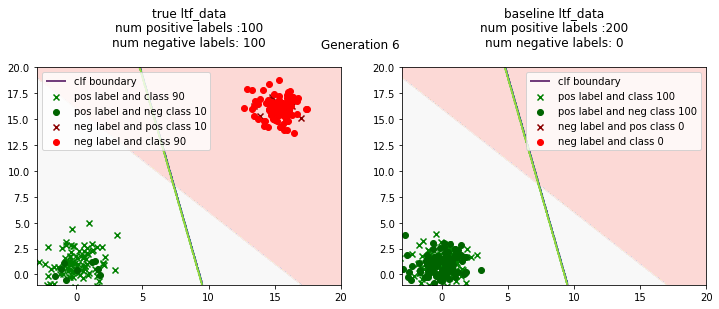

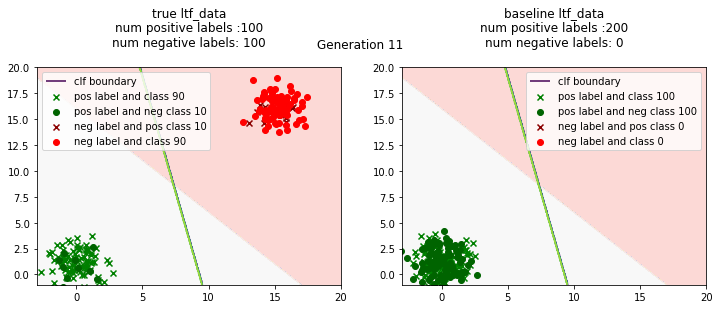

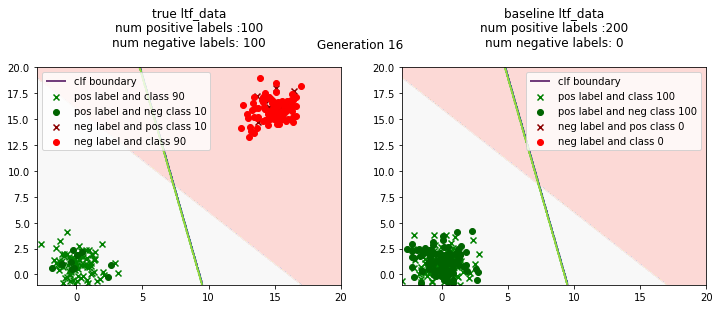

In [9]:
for i in range(20):

    l.run_generation()
    l._run_baseline_generation()
    if i %5 == 0:
        l.plot_generation()

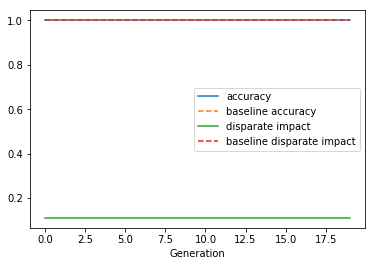

In [10]:
l.plot_ltf(["accuracy", "disparate impact"])

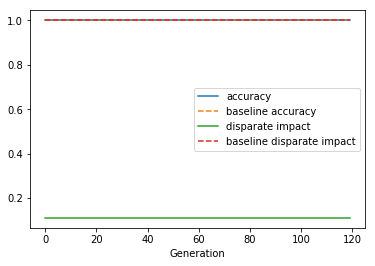

In [11]:
l.run(100)
l.plot_ltf(["accuracy", "disparate impact"])